In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_t = pd.read_csv("https://raw.githubusercontent.com/farshidmh/Python-DS-ML-VS/main/dataset/titanic.csv")

In [ ]:
df_t

In [4]:
df_t.shape

(418, 12)

In [ ]:
df_t.nunique()

In [ ]:
df_t.isnull().sum()

In [8]:
df_t.drop( columns=['PassengerId','Name','Ticket','Cabin'], axis=1 , inplace=True )

In [ ]:
df_t.nunique()

In [12]:
df_t['Survived'].unique()

array([0, 1])

In [ ]:
df_t['Survived'].value_counts()

In [14]:
df_t['Pclass'].unique()

array([3, 2, 1])

In [ ]:
df_t['Pclass'].value_counts()

<ipython-input-16-d37a5b8c8d78>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot( df_t , x='Survived', y='Age', palette=['red','green'] )


<Axes: xlabel='Survived', ylabel='Age'>

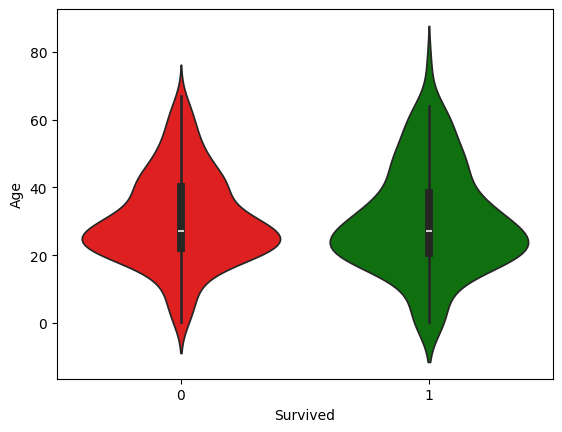

In [16]:
sns.violinplot( df_t , x='Survived', y='Age', palette=['red','green'] )

In [17]:
df_t['Age'] = df_t['Age'].fillna( df_t['Age'].mean() )

In [19]:
df_t['Fare'] = df_t['Fare'].fillna( df_t['Fare'].mean() )

In [ ]:
df_t

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [27]:
categorical_features = ['Pclass','Sex','Embarked']
numeric_features = ['Age','SibSp','Parch','Fare']

In [30]:
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median') ),
        ('scaler', StandardScaler() )
    ]
)
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [32]:
cat_transformers = Pipeline(
    steps=[
        ('imputer', SimpleImputer( strategy='constant', fill_value='missing' ) ),
        ('onehot', OneHotEncoder( handle_unknown='ignore' ) )
    ]
)
cat_transformers

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [33]:
prep = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features ),
        ('cat', cat_transformers, categorical_features )
    ]
)
prep

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked'])])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df_t.drop( columns=['Survived'] )
y = df_t['Survived']


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
clf = Pipeline([
    ('pre',prep ),
    ('classifier', RandomForestClassifier( n_estimators=100 ) )
])

clf


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier())])

In [43]:
clf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier())])

In [44]:
score = clf.score( X_test, y_test )
score

1.0